# A Descriptive Analysis of Stroke Patients Based on Health Indicators and Lifestyle Circumstances
  
### CSMODEL Case Study

Joseph Eusebio (S15)
Kenwin Reyes (S15)

In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from mlxtend.frequent_patterns import apriori, association_rules

## Dataset Description



### What is a Stroke?

A stroke is a life-threatening medical condition that occurs when the blood supply to part of the brain is interrupted or reduced. This prevents brain tissue from getting oxygen and nutrients, causing brain cells to die. The interruption of blood flow can be due to a blocked artery or leaking or bursting of a blood vessel.

### Dataset Used

The dataset we are using is called "[Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)" and it is used to predict a patients likelihood of experiencing a stroke based on parameters such as their gender, age, health condition they may have, as well as their lifestyle circumstances.

### Data Collection
The dataset used in this research was obtained from a confidential source. Due to the confidential nature of the data, details about the specific source are not disclosed to maintain privacy and adhere to the terms of use. The data is intended for educational purposes only, and any utilization for research purposes requires proper crediting to the author, as specified by the source.

The dataset is from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data   

By the author: Federico Soriano Palacios  
LinkedIn: https://www.linkedin.com/in/federico-soriano-palacios/  
Kaggle: https://www.kaggle.com/fedesoriano  
Github: https://github.com/fedesoriano

In [2]:
stroke_df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Each row in the dataset is a patient and each column is a characteristic of each patient with the last column "stroke" being whether or not they had a stroke.

There are a total of 5110 observations and 12 variables in the dataset.

### Variable Description

The following descriptions of the variables are directly gotten from the source webpage of the dataset.

1. `id`: Unique identifier  
  
2. `gender`:   
"`Male`", "`Female`", or "`Other`" to specify the individuals gender  
  
3. `age`: Age of the patient  

4. `hypertension`:  
`1` If the patient has hypertension  
`0` If the patient has no hypertension  

5. `heart_disease`:  
`1` If the patient has heart disease  
`0` If the patient has no heart disease  

6. `ever_married`:  
"`No`" or "`Yes`" if the person has married  

7. `work_type`:  
"`children`", "`Govt_jov`", "`Never_worked`", "`Private`", or "`Self-employed`"  

8. `Residence_type`:  
"`Rural`" or "`Urban`"  

9. `avg_glucose_level`: average glucose level in the blood of the patient  

10. `bmi`: body mass index of the patient  

11. `smoking_status`:  
"`formerly smoked`", "`never smoked`", "`smokes`", or "`Unknown`" meaning information of the patient was not available  

12. `stroke`:  
`1` If the patient had a stroke  
`0` If the patient didn't have a stroke


## Data Cleaning

### Checking for any null values



In [4]:
stroke_df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [5]:
stroke_df['bmi'].isnull().sum()

201

In [6]:
stroke_df.shape

(5110, 12)

Dropping observations with null values for "bmi"

In [7]:
stroke_df = stroke_df.dropna(subset='bmi')

The reason why we are dropping observations with a null bmi in the dataset about stroke prediction is because the body mass index (BMI) is an important health indicator that can affect the likelihood of experiencing a stroke. Since the dataset is used to predict a patient's likelihood of experiencing a stroke based on various health indicators, including BMI, it is important to have complete data for this variable. Dropping observations with null values for BMI ensures that we have a complete dataset for analysis and modeling.

In [8]:
stroke_df.shape

(4909, 12)

In [9]:
stroke_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Setting "age" values to int by rounding up floats

In [10]:
stroke_df['age'] = stroke_df['age'].apply(lambda x: math.ceil(x))

In [11]:
stroke_df['age'] = stroke_df['age'].astype(int)

In [12]:
display(stroke_df.dtypes)

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Converting age to int and rounding to the ceiling is done to make the data more readable and easier to work with. Age is a discrete variable, so it makes sense to represent it as an integer rather than a float. Rounding the age values to the highest integer ensures that the data is still accurate while making it easier to understand and analyze. Additionally, many statistical methods require integer values, so rounding the age values to the nearest integer can make it easier to perform statistical analyses on the data.

### Dropping of the single observation with the "Other" value for gender

The reason why we are dropping the single observation with "Other" value for gender is because the dataset is used to predict a patient's likelihood of experiencing a stroke based on various health indicators, including gender. Since the "Other" value for gender is not a common value and there is only one observation with this value, it is difficult to accurately predict the likelihood of experiencing a stroke for patients with this value.

In [13]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df.shape

(4908, 12)

## Exploratory Data Analysis

### Summary Statistics

In [14]:
stroke_df_filtered = stroke_df[stroke_df['stroke'] == 1]
stroke_df.drop('id', axis=1).describe().drop('count')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
mean,42.879788,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.535885,0.288901,0.216954,44.425550,7.85432,0.201937
min,1.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


### How many observations in this dataset have had a stroke?

In [15]:
stroke_count = stroke_df['stroke'].value_counts()
stroke_count

stroke
0    4699
1     209
Name: count, dtype: int64

<Axes: xlabel='stroke'>

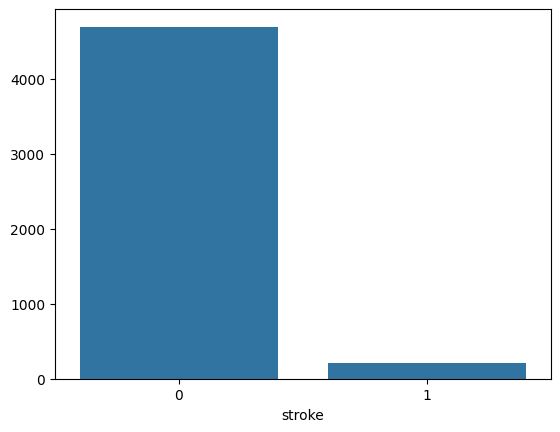

In [16]:
sns.barplot(x=stroke_count.index, y=stroke_count.values)

__Insights__  

As we can see from the data, the amount of observations in the dataset with stroke is much smaller than that of observations without. This may lead to some problems later on so it would be best to keep this in mind when analyzing the dataset.

### What are the distributions of numerical variables across the dataset?

This section delves into the distributions of each variables, this also takes into account the distributions of these variables in relation to stroke. This means that we will also be looking into the distributions of observations with stroke only.


1. a.  __AGE ACROSS ENTIRE OBSERVATIONS__

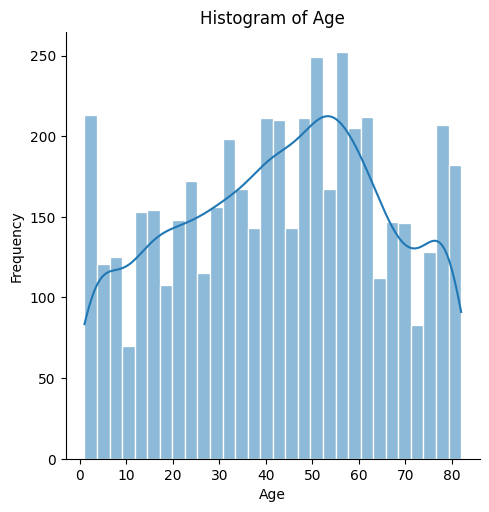

In [17]:
warnings.filterwarnings('ignore')

sns.displot(stroke_df['age'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')


plt.show()


1. b. __AGE AMONG OBSERVATIONS WITH STROKE__

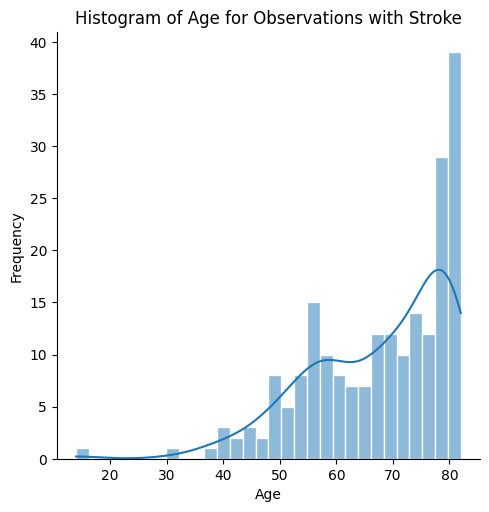

In [18]:
sns.displot(stroke_df_filtered['age'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for Observations with Stroke')

plt.show()


1. c. __Insights__

Based on the histograms created, we can notice that they don' quite look normally distributted. We can also see that majority of the patients being from ages 40 and above. The histogram of age for observations with stroke shows that the majority of patients who had a stroke were above the age of 60. This suggests that age is a significant factor in the likelihood of experiencing a stroke.

5. a. __BMI ACROSS ALL OBSERVATIONS__

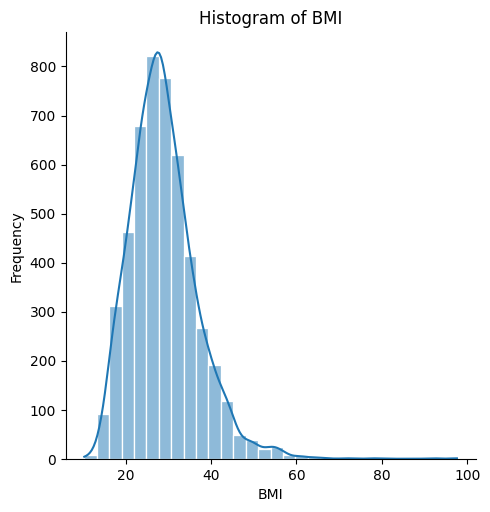

In [19]:
sns.displot(stroke_df['bmi'], bins=30, kde=True, edgecolor='white')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()


5. b. __BMI ACROSS OBSERVATIONS WITH STROKE__

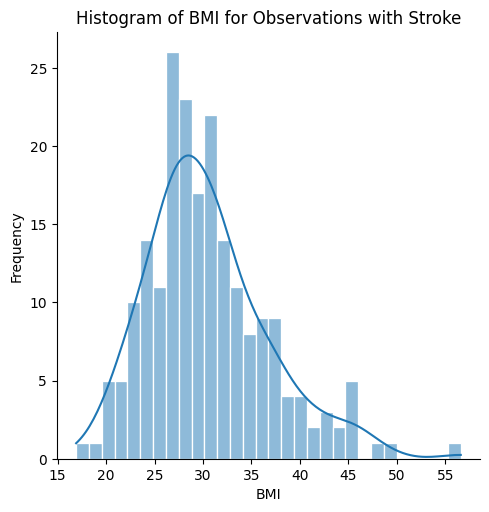

In [20]:
sns.displot(stroke_df_filtered['bmi'], bins=30, kde=True, edgecolor='white')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI for Observations with Stroke')
plt.show()


5. c. __Insights__  
  
The results show us that both distributions look like they are positively skewed. We can also notice that the majority of the observations for both distributions also fall in the same range which is around 30.

6. a. __AVG GLUCOSE LEVEL ACROSS ENTIRE OBSERVATIONS__

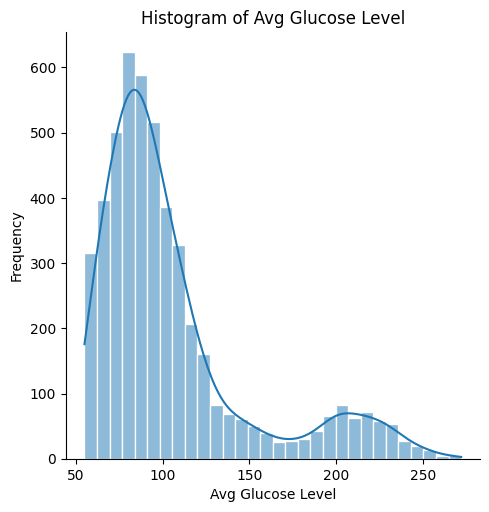

In [21]:
sns.displot(stroke_df['avg_glucose_level'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Glucose Level')
plt.show()

6. b. __AVG GLUCOSE LEVELS ACROSS OBSERVATIONS WITH STROKE__

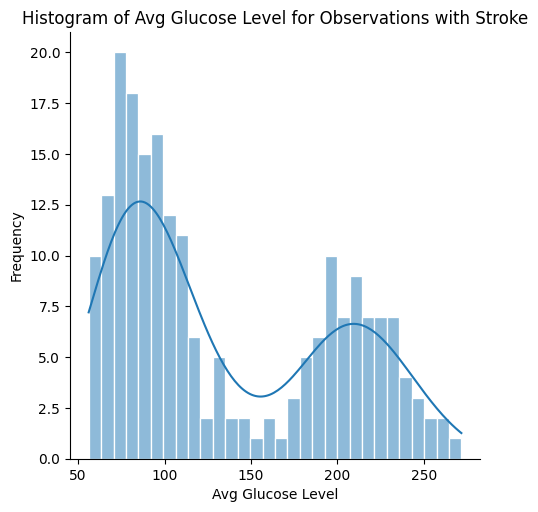

In [22]:
sns.displot(stroke_df_filtered['avg_glucose_level'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Glucose Level for Observations with Stroke')
plt.show()

6. c. __Insights__  
  
Just like with BMI we can notice a similar pattern among the 2 distributions which seem to suggest that these factors both BMI and Average glucose levels may not be as significant when comparing it to the distribution of Age between the entire population and those with only stroke wherein the two distributions look very different from each other.

### What are the Proportions of Categorical Variables in the Stroke Dataset?

In this section we'll delve into the different proportions of the categorical variables found in the dataset, and just like the previous section we will also be including these variable in relation with stroke.

1. a. __HYPERTENSION__

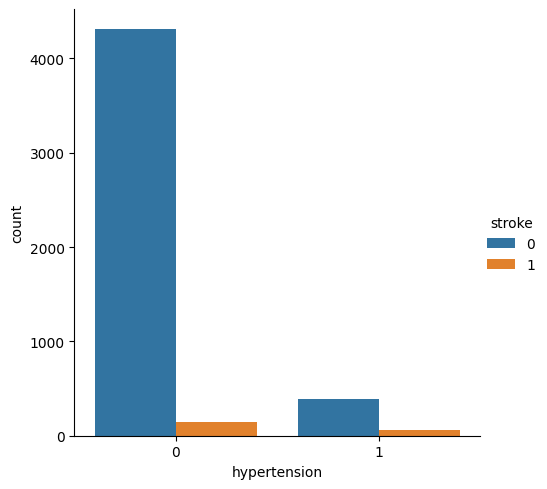

In [23]:
sns.catplot(x='hypertension', hue='stroke', data=stroke_df, kind='count')
plt.show()

In [24]:
stroke_df['hypertension'].value_counts()

hypertension
0    4457
1     451
Name: count, dtype: int64

In [25]:
proportion = stroke_df['hypertension'].value_counts()[1] / stroke_df.shape[0]
print(f"{proportion*100:.2f}% of patients in the dataset have hypertension")

9.19% of patients in the dataset have hypertension


In [26]:
stroke_df_filtered['hypertension'].value_counts()

hypertension
0    149
1     60
Name: count, dtype: int64

In [27]:
proportion = stroke_df_filtered['hypertension'].value_counts()[1] / stroke_df_filtered.shape[0]
print(f"{proportion*100:.2f}% of patients with stroke have hypertension")

28.71% of patients with stroke have hypertension


1. b. __Insights__  

The results show us that the proportion of patients that experienced a stroke and have hypertension is higher at 28.71% compared to the overall proportion across the dataset of patients that have hypertension at 9.19%. This may suggest that hypertension is a significant factor in the likelihood of experiencing a stroke.


2. a. __GENDER__

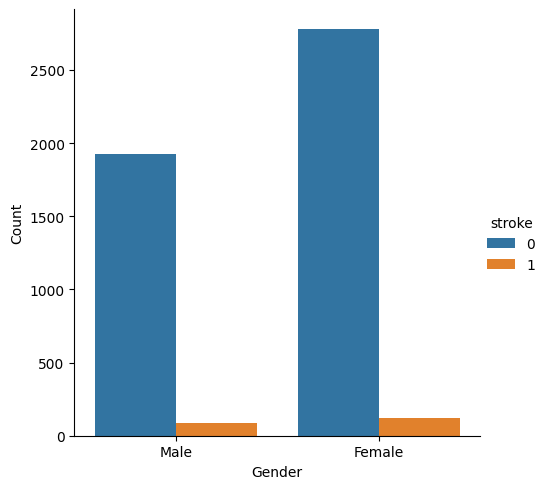

In [28]:
sns.catplot(x='gender', hue='stroke', data=stroke_df, kind='count')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [29]:
male_df = stroke_df[stroke_df['gender'] == 'Male']
male_stroke_df = male_df[male_df['stroke'] == 1]
proportion = male_stroke_df.shape[0] / male_df.shape[0]
print(f"The proportion of males in the dataset that had a stroke over the total males is {proportion:.2%}")



The proportion of males in the dataset that had a stroke over the total males is 4.43%


In [30]:
female_df = stroke_df[stroke_df['gender'] == 'Female']
female_stroke_df = female_df[female_df['stroke'] == 1]
proportion = female_stroke_df.shape[0] / female_df.shape[0]
print(f"The proportion of females in the dataset that had a stroke over the total females is {proportion:.2%}")


The proportion of females in the dataset that had a stroke over the total females is 4.14%


2. b. __Insights__  
  
There are more females overall in the dataset. And this is also true for observations with stroke only and those without stroke only. However the proportions of patients who got a stroke among these groups are roughly the same with the males having a 4.43% and females having a 4.14%

3. a. __HEART DISEASE__

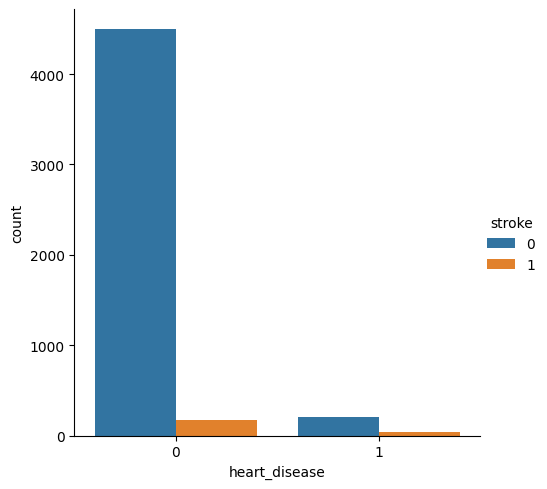

In [31]:
sns.catplot(x='heart_disease', hue='stroke', data=stroke_df, kind='count')
plt.show()

In [32]:
proportion = stroke_df['heart_disease'].value_counts()[1] / stroke_df.shape[0]
print(f"{proportion*100:.2f}% of patients in the dataset have heart disease")

4.95% of patients in the dataset have heart disease


In [33]:
proportion = stroke_df_filtered['heart_disease'].value_counts()[1] / stroke_df_filtered.shape[0]
print(f"{proportion*100:.2f}% of patients with stroke have heart disease")

19.14% of patients with stroke have heart disease


3. b. __Insights__  
  
A similar pattern can be noticed here with that of Hypertension

4. a. __EVER MARRIED__

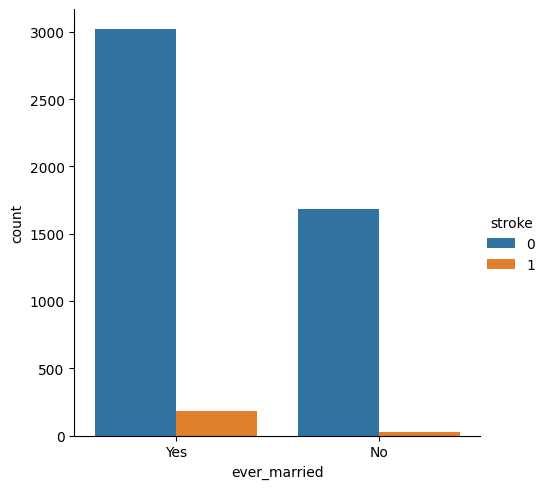

In [34]:
sns.catplot(x='ever_married', hue='stroke', data=stroke_df, kind='count')
plt.show()


5. a. __WORK TYPE__

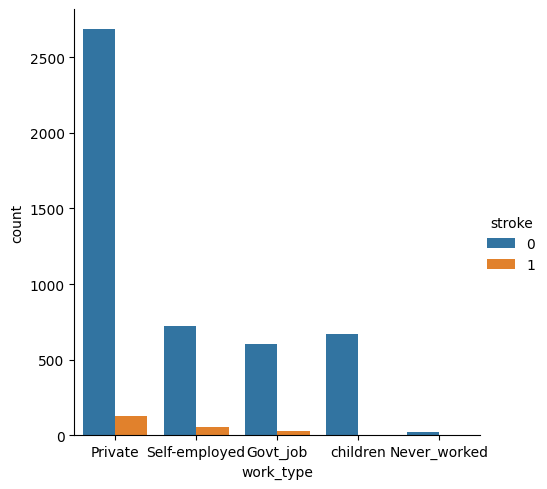

In [35]:
sns.catplot(x='work_type', hue='stroke', data=stroke_df, kind='count')
plt.show()

6. a. __RESIDENCE TYPE__

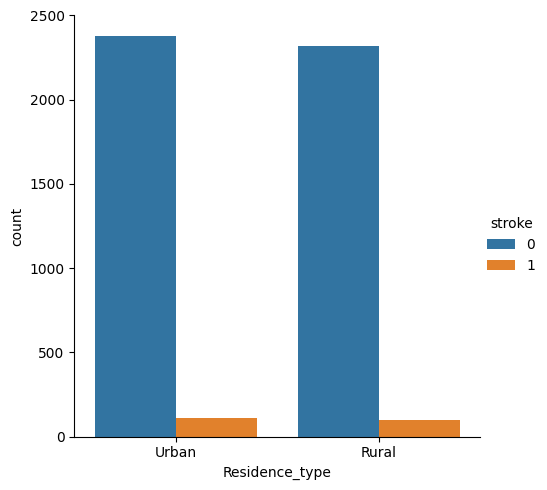

In [36]:
sns.catplot(x='Residence_type', hue='stroke', data=stroke_df, kind='count')
plt.show()

7. __General Insights__  
  
The distribution of marital status and residence type appears to offer limited insights into stroke-positive individuals. The distribution of residence type is nearly uniform, indicating no particular type of residence is predominantly associated with stroke-positive individuals. Similarly, the distribution of marital status is heavily skewed towards one value, suggesting that marital status may not be a significant factor in differentiating stroke-positive individuals.

### What are the Correlations Between Variables?

1.a Correlation matrix of health attributes to stroke

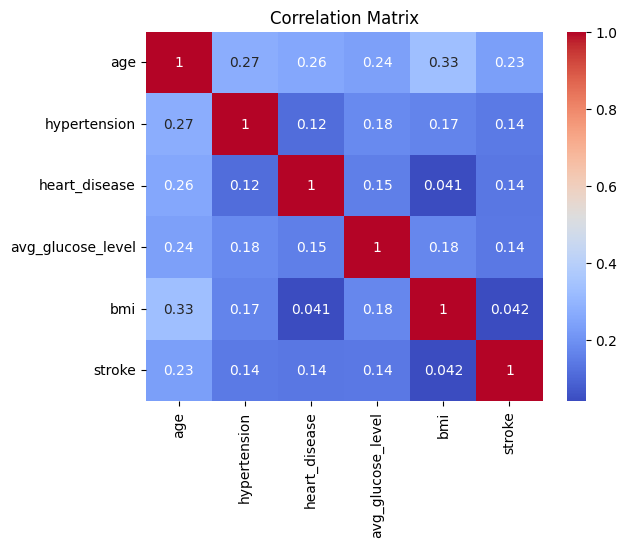

In [37]:
numeric_df = stroke_df.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)
corr_matrix = numeric_df.corr()


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


1.b Correlation matrix of observations that do have a stroke and their health attributes

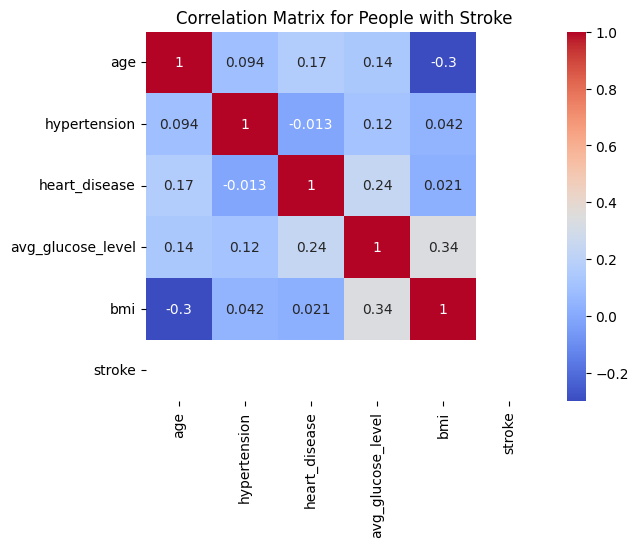

In [38]:
stroke_df_filtered = stroke_df[stroke_df['stroke'] == 1]

numeric_df = stroke_df_filtered.drop(['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis=1)

corr_matrix = numeric_df.corr()

# display correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for People with Stroke')
plt.show()


The correlation of the health atrributes of a stroke patient to other health attributes is mostly none to low positive correlation. The correlation of age and bmi actually has a low negative correlation. This shows that the body mass index of a stroke patient decreases as they get older. The correlation of body mass index and the average glucose level of a stroke patient has a low positive correlation. This shows that as the average glucose level of a stroke patient increases as their body mass index increases. The correlation of heart disease and the average glucose level of a stroke patient has also a low positive correlation. This shows that the occurrence of a heart disease and the increased average glucose level of a stroke patient is somewhat related.

In [39]:
stroke_df['stroke'].corr(stroke_df['avg_glucose_level'])

0.13898364739425237

The correlation of the average glucose level of a person to whether they had a stroke is none to low positive correlation

In [40]:
stroke_df['stroke'].corr(stroke_df['bmi'])

0.04234127718027809

The correlation of the body mass index of a person to whether they had a stroke is none to low positive correlation

In [41]:
stroke_df['hypertension'].corr(stroke_df['stroke'])

0.14250305423267237

The correlation of whether the person has hypertension to whether they had a stroke is none to low positive correlation

In [42]:
stroke_df['heart_disease'].corr(stroke_df['stroke'])

0.13792933918600514

The correlation of whether the person has a heart disease to whether they had a stroke is none to low positive correlation

In [43]:
stroke_df1 = stroke_df.copy()
stroke_df1['smoking_status'] = stroke_df1['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

We replace the smoking_status variable to numerical values so that we can use correlation

In [44]:
stroke_df1['smoking_status'].value_counts()

smoking_status
0.0    1852
1.0     836
2.0     737
Name: count, dtype: int64

In [45]:
stroke_df1['smoking_status'].isnull().sum()

1483

We didn't map the 'unknown' values in the 'smoking_status' variable, making it mapped to NaN, which we plan to remove from the table

In [46]:
stroke_df1 = stroke_df1.dropna(subset='smoking_status')
stroke_df1['smoking_status'].isnull().sum()

0

Since there are no more null values, we can now proceed to correlation

In [47]:
stroke_df1['smoking_status'].corr(stroke_df1['stroke'])

0.0220706421098788

The correlation of whether the person never smoked, formerly smoked, or still smokes to whether they had a stroke is none to low positive correlation

Text(0, 0.5, 'Age')

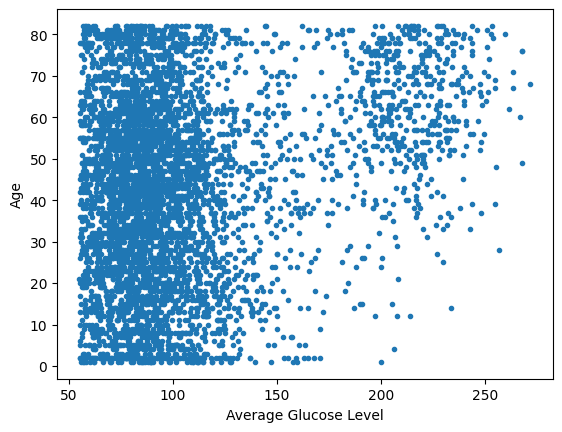

In [48]:
plt.plot(stroke_df['avg_glucose_level'], stroke_df['age'], '.')
plt.xlabel('Average Glucose Level')
plt.ylabel('Age')

In [49]:
stroke_df['avg_glucose_level'].corr(stroke_df['age'])

0.23609780011286272

The correlation of the average glucose level of the patient to their age is a low positive correlation

Text(0, 0.5, 'Age')

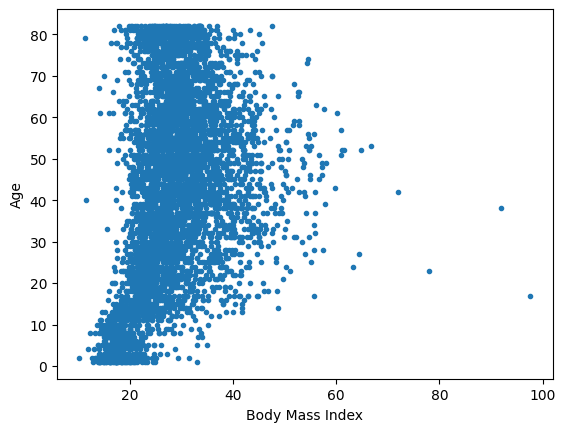

In [50]:
plt.plot(stroke_df['bmi'], stroke_df['age'], '.')
plt.xlabel('Body Mass Index')
plt.ylabel('Age')

In [51]:
stroke_df['bmi'].corr(stroke_df['age'])

0.33294793851041005

The correlation of the patient's body mass index to their age is a low positive correlation

## Research Question

### Can we categorize stroke patients based on their health indicators such as age, hypertension, heart disease, average glucose levels, and their lifestyle circumstances?


Through the exploratory data analysis of the stroke prediction dataset, we’ve gained insights into the complex relationships between various demographic and health-related variables and the likelihood of a stroke which lead us to our research question. By categorizing stroke patients into subgroups based on similarities to their health indicators and lifestyle circumstances, we can gain a more comprehensive understanding of the factors that contribute to stroke risk and develop more effective prevention and treatment strategies.

The research question is answerable by performing data mining techniques such as clustering or factor analysis, which are covered in class and can be used to identify subgroups of stroke patients based on their health indicators and lifestyle circumstances.

The research question is important and significant because stroke is a major cause of disability and death worldwide, and accurate identification of patient subgroups based on their health indicators and lifestyle circumstances can help healthcare providers to implement more targeted prevention and treatment strategies and improve patient outcomes.

## Data Modeling

### Pre-processing

Since we are trying to categorize stroke patients based on their health indicators, it makes sense to only focus on the observations with the value of 1 in the stroke variable. 

In [52]:
new_stroke_df = stroke_df[stroke_df['stroke'] == 1]
new_stroke_df = new_stroke_df.drop(['id', 'stroke'], axis=1)

We also drop the Id column since it can provide no meaningful information.

In [53]:
new_stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             209 non-null    object 
 1   age                209 non-null    int32  
 2   hypertension       209 non-null    int64  
 3   heart_disease      209 non-null    int64  
 4   ever_married       209 non-null    object 
 5   work_type          209 non-null    object 
 6   Residence_type     209 non-null    object 
 7   avg_glucose_level  209 non-null    float64
 8   bmi                209 non-null    float64
 9   smoking_status     209 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 17.1+ KB


Afterwards lets create a new DataFrame which we will use for our clustering. In this DataFrame we will be using one hot encoding on the categorical variables in order to prepare it for clustering.

In [54]:
clustering_df = new_stroke_df.copy()
clustering_df = pd.get_dummies(clustering_df, columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status'])
clustering_df.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67,0,1,228.69,36.6,False,True,False,True,False,False,False,True,False,True,False,False
2,Male,80,0,1,105.92,32.5,False,True,False,True,False,False,True,False,False,False,True,False
3,Female,49,0,0,171.23,34.4,False,True,False,True,False,False,False,True,False,False,False,True
4,Female,79,1,0,174.12,24.0,False,True,False,False,True,False,True,False,False,False,True,False
5,Male,81,0,0,186.21,29.0,False,True,False,True,False,False,False,True,False,True,False,False


We will also then be turning all the values for gender to 0 and 1. `0` for male, `1` for female 

In [55]:
clustering_df['gender'] = clustering_df['gender'].map({'Male': 0, 'Female': 1})
clustering_df.head(5)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,228.69,36.6,False,True,False,True,False,False,False,True,False,True,False,False
2,0,80,0,1,105.92,32.5,False,True,False,True,False,False,True,False,False,False,True,False
3,1,49,0,0,171.23,34.4,False,True,False,True,False,False,False,True,False,False,False,True
4,1,79,1,0,174.12,24.0,False,True,False,False,True,False,True,False,False,False,True,False
5,0,81,0,0,186.21,29.0,False,True,False,True,False,False,False,True,False,True,False,False


With that we are ready to start clustering.

### Clustering

Before we start clustering using K-means. We must first determine the optimal number of clusters to use. We will use the elbow method to determine the optimal number of clusters.

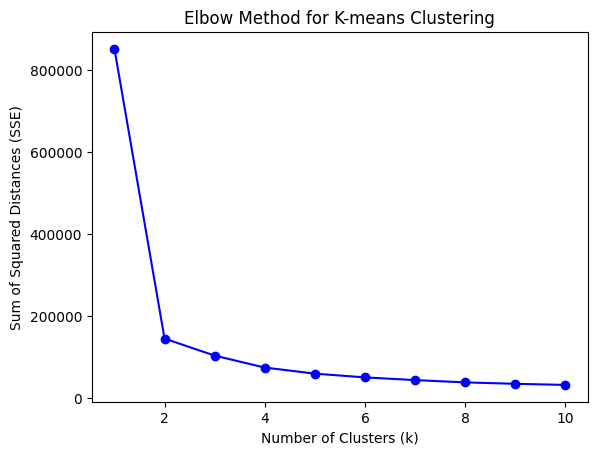

In [56]:
# Initialize an empty list to store the SSE values
sse = []

# Define the range of k values to test
k_values = range(1, 11)

# Perform k-means clustering for each value of k
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(clustering_df)
  sse.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for K-means Clustering')
plt.show()


With that we decided we would use 2 clusters for our K-means

In [57]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(clustering_df)

cluster_labels = kmeans.labels_

clustering_df['cluster'] = cluster_labels

clustering_df.head()


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,cluster
0,0,67,0,1,228.69,36.6,False,True,False,True,False,False,False,True,False,True,False,False,1
2,0,80,0,1,105.92,32.5,False,True,False,True,False,False,True,False,False,False,True,False,0
3,1,49,0,0,171.23,34.4,False,True,False,True,False,False,False,True,False,False,False,True,1
4,1,79,1,0,174.12,24.0,False,True,False,False,True,False,True,False,False,False,True,False,1
5,0,81,0,0,186.21,29.0,False,True,False,True,False,False,False,True,False,True,False,False,1


### Cluster Analysis

After performing the Clustering let's analyze the results by grouping the observations based on their clusters and the get the mean of the numerical features and mode of the categorical features of each cluster.

In [58]:
new_stroke_df['cluster'] = cluster_labels
grouped_df = new_stroke_df.groupby('cluster').agg({
  'age': 'mean',
  'avg_glucose_level': 'mean',
  'bmi': 'mean',
  'hypertension': lambda x: x.value_counts().index[0],
  'heart_disease': lambda x: x.value_counts().index[0],
  'ever_married': lambda x: x.value_counts().index[0],
  'work_type': lambda x: x.value_counts().index[0],
  'Residence_type': lambda x: x.value_counts().index[0],
  'smoking_status': lambda x: x.value_counts().index[0]
})
print(grouped_df)


               age  avg_glucose_level        bmi  hypertension  heart_disease  \
cluster                                                                         
0        66.674242          90.166212  28.937879             0              0   
1        69.493506         210.694545  33.100000             0              0   

        ever_married work_type Residence_type smoking_status  
cluster                                                       
0                Yes   Private          Urban   never smoked  
1                Yes   Private          Urban   never smoked  


The results from the clustering analysis suggest that stroke patients can be categorized into two groups based on their health indicators and lifestyle circumstances:

1. **Cluster 0**: This group consists of stroke patients who are on average around 66 years old, have an average glucose level of around 90, and an average BMI of around 29. Most of these patients do not have hypertension or heart disease. The majority are married, work in private jobs, live in urban areas, and have never smoked. This group might represent stroke patients with relatively less severe health conditions.

2. **Cluster 1**: This group consists of stroke patients who are slightly older (around 69 years on average), have a significantly higher average glucose level of around 210, and a higher average BMI of around 33. Most of these patients also do not have hypertension or heart disease. The majority are married, work in private jobs, live in urban areas, and have never smoked. This group might represent stroke patients with more severe health conditions, as indicated by their higher glucose levels and BMI.

While most characteristics between the 2 clusters are similar, there are still some differences. These categories can help in understanding the different subgroups of stroke patients and tailoring treatment and prevention strategies accordingly. For example, patients in Cluster 1 might require more intensive management of their glucose levels and BMI.

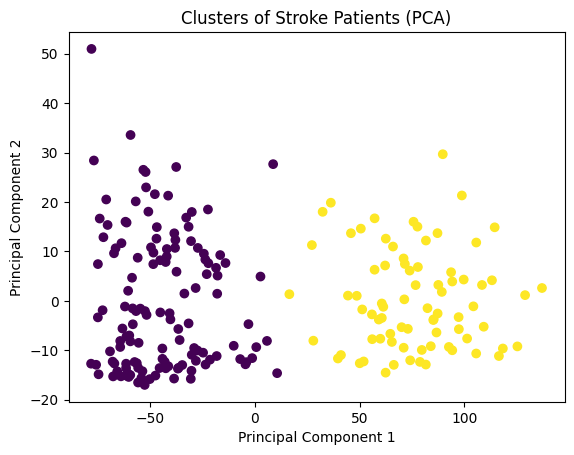

In [59]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_df.drop('cluster', axis=1))

# Create a scatter plot of the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clustering_df['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Stroke Patients (PCA)')
plt.show()


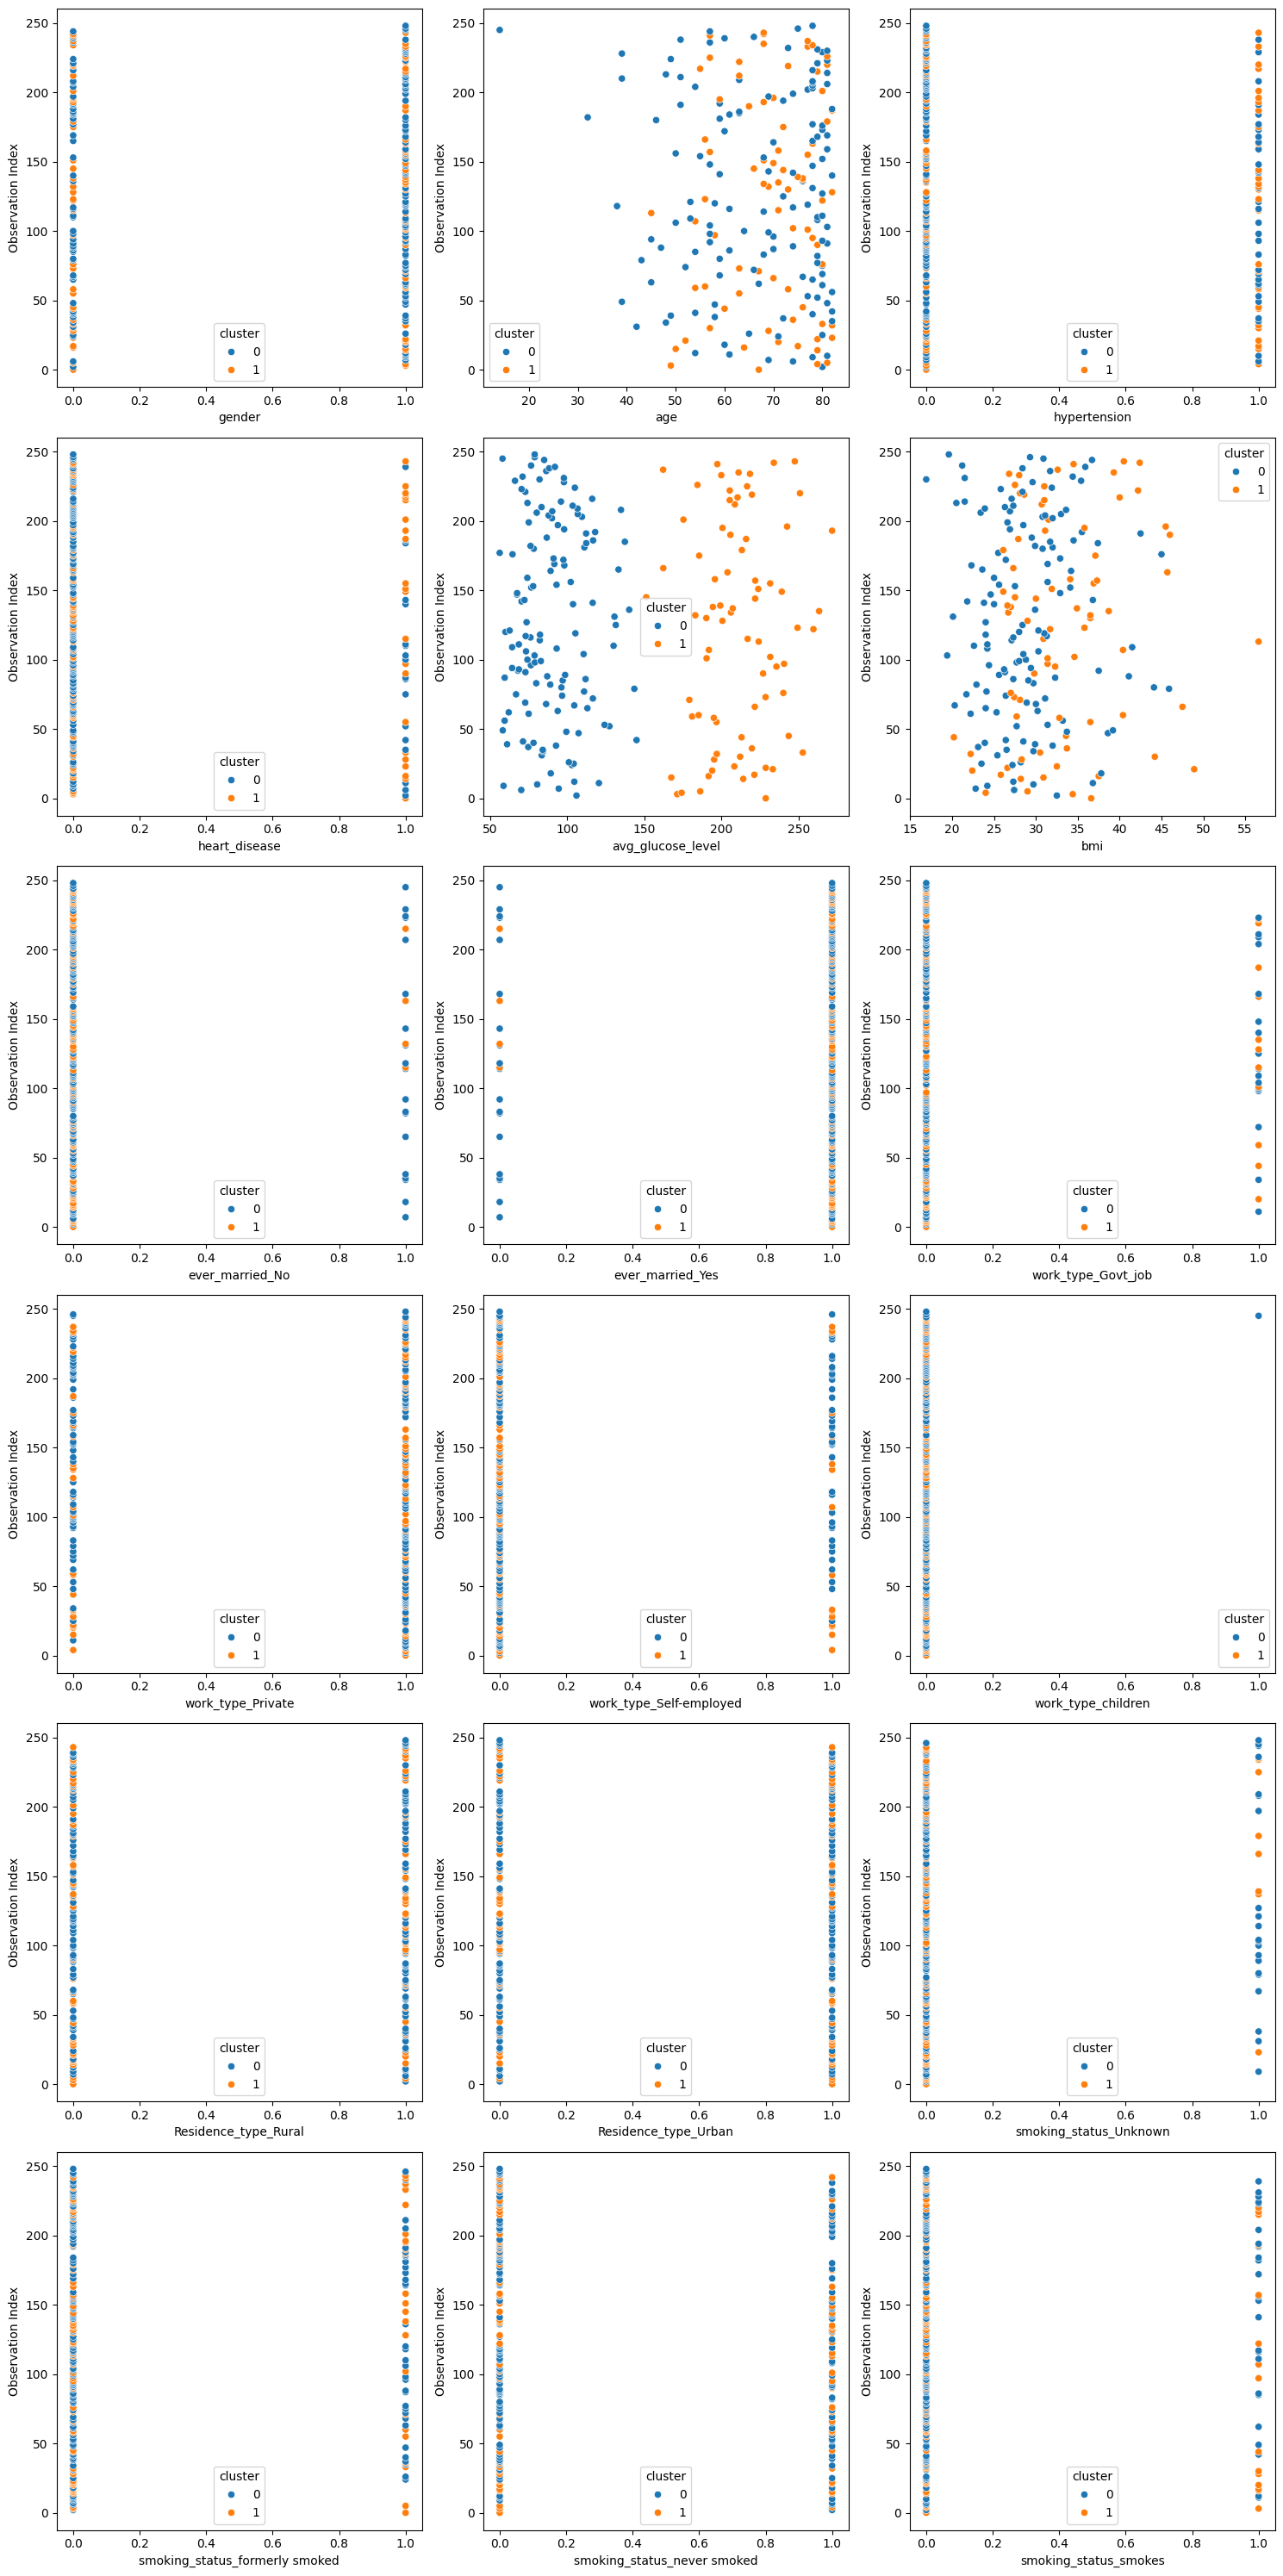

In [60]:
import seaborn as sns

# Calculate the number of rows and columns for the subplot grid
num_vars = len(clustering_df.columns[:-1])
num_rows = (num_vars - 1) // 3 + 1
num_cols = min(num_vars, 3)

# Create subplots for each variable
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iterate over each variable
for i, col in enumerate(clustering_df.columns[:-1]):
  # Get the variable values and cluster assignments
  values = clustering_df[col]
  clusters = clustering_df['cluster']
  
  # Create a scatter plot with cluster colors
  sns.scatterplot(x=values, y=values.index, hue=clusters, ax=axes[i//num_cols, i%num_cols])
  axes[i//num_cols, i%num_cols].set_xlabel(col)
  axes[i//num_cols, i%num_cols].set_ylabel('Observation Index')

plt.tight_layout()
plt.show()


### Association Rule Mining on each Cluster

Before we can start finding rules, we must first turn our numerical data in categorical. Do this we will be implementing binning on these numerical features

First, we shall before binning on the `age` variable.

The reason for binning by these values is to create meaningful groups that can help in analyzing and interpreting the data. By dividing the age variable into two categories based on the age of 65, we can compare and analyze the differences in health indicators and lifestyle circumstances between individuals who are younger and older.

Binning by these values is considered appropriate in this context because the age of 65 is commonly used as a threshold for categorizing individuals into different age groups, such as "working age" and "retirement age". It is a widely recognized age at which individuals may experience changes in health conditions and lifestyle factors. Binning by this threshold allows us to examine potential differences in stroke risk and related factors between these two age groups.


In [61]:
# Perform binning on the "age" column
ARM_stroke_df = new_stroke_df.copy()
ARM_stroke_df['age'] = pd.cut(ARM_stroke_df['age'], bins=[0, 65, float('inf')], labels=['<=65', '>65'])

# Display the updated dataframe
ARM_stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,cluster
0,Male,>65,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,>65,0,1,Yes,Private,Rural,105.92,32.5,never smoked,0
3,Female,<=65,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,>65,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,>65,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Next, we will perform binning on `avg_glucose_level`

1. **Low**: Glucose levels below a certain threshold (e.g., 70 mg/dL) can be considered as low. This category may represent individuals with hypoglycemia or normal glucose levels.

2. **Normal**: Glucose levels within a certain range (e.g., 70-140 mg/dL) can be considered as normal. This category may represent individuals with healthy glucose levels.

3. **High**: Glucose levels above a certain threshold (e.g., 140 mg/dL) can be considered as high. This category may represent individuals with hyperglycemia or diabetes.
  
The values of these bins have been the general way glucose level has always been categorized, which is why we did it this way.


In [62]:
# Perform binning on the "avg_glucose_level" column
ARM_stroke_df['avg_glucose_level'] = pd.cut(ARM_stroke_df['avg_glucose_level'], bins=[-float('inf'), 70, 140, float('inf')], labels=['low', 'normal', 'high'])

# Display the updated dataframe
ARM_stroke_df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,cluster
0,Male,>65,0,1,Yes,Private,Urban,high,36.6,formerly smoked,1
2,Male,>65,0,1,Yes,Private,Rural,normal,32.5,never smoked,0
3,Female,<=65,0,0,Yes,Private,Urban,high,34.4,smokes,1
4,Female,>65,1,0,Yes,Self-employed,Rural,high,24.0,never smoked,1
5,Male,>65,0,0,Yes,Private,Urban,high,29.0,formerly smoked,1


Finally, for `bmi`  

To determine the limits for binning the BMI (Body Mass Index) variable, it is important to consider the standard BMI categories used in healthcare and research. These categories are based on the World Health Organization (WHO) guidelines and are widely recognized and accepted.

The standard BMI categories are as follows:

1. Underweight: BMI less than 18.5
2. Normal weight: BMI between 18.5 and 24.9
3. Overweight: BMI between 25 and 29.9
4. Obesity: BMI greater than or equal to 30

These limits are reasonable because they reflect the general understanding of BMI and its association with health risks. Binning the BMI variable into these categories allows for meaningful comparisons and analysis of the relationship between BMI and other health indicators or lifestyle circumstances.


In [63]:
# Perform binning on the "bmi" column
ARM_stroke_df['bmi'] = pd.cut(ARM_stroke_df['bmi'], bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

# Display the updated dataframe
ARM_stroke_df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,cluster
0,Male,>65,0,1,Yes,Private,Urban,high,Obesity,formerly smoked,1
2,Male,>65,0,1,Yes,Private,Rural,normal,Obesity,never smoked,0
3,Female,<=65,0,0,Yes,Private,Urban,high,Obesity,smokes,1
4,Female,>65,1,0,Yes,Self-employed,Rural,high,Normal weight,never smoked,1
5,Male,>65,0,0,Yes,Private,Urban,high,Overweight,formerly smoked,1


Now we can finally start finding rules. Our thresholds are as follows. Support = 40%, Confidence = 75%  
  
  
These thresholds strike a balance between capturing meaningful patterns in the data and avoiding overly specific or trivial rules. Adjusting these thresholds can result in different sets of rules with varying levels of significance and interpretability.  
  
  
Lets first find rules for our `cluster 0`

In [64]:
cluster_0_ARM_df = ARM_stroke_df[ARM_stroke_df['cluster'] == 0]

# Convert categorical variables to one-hot encoded format
cluster_0_ARM_df = pd.get_dummies(cluster_0_ARM_df)

# Perform frequent itemset mining using Apriori algorithm
cluster_0_frequent_itemsets = apriori(cluster_0_ARM_df, min_support=0.4, use_colnames=True)

# Generate association rules
cluster_0_rules = association_rules(cluster_0_frequent_itemsets, metric="confidence", min_threshold=0.75)

# Set the option to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the association rules
print(cluster_0_rules)

                                      antecedents                 consequents  \
0                                 (gender_Female)          (ever_married_Yes)   
1                                 (gender_Female)  (avg_glucose_level_normal)   
2                                       (age_>65)          (ever_married_Yes)   
3                                       (age_>65)  (avg_glucose_level_normal)   
4                             (work_type_Private)          (ever_married_Yes)   
5                          (Residence_type_Rural)          (ever_married_Yes)   
6                          (Residence_type_Urban)          (ever_married_Yes)   
7                              (ever_married_Yes)  (avg_glucose_level_normal)   
8                      (avg_glucose_level_normal)          (ever_married_Yes)   
9                             (work_type_Private)  (avg_glucose_level_normal)   
10                         (Residence_type_Rural)  (avg_glucose_level_normal)   
11                         (

In [65]:
# Display the association rules with only antecedents and consequents
cluster_0_rules[['antecedents', 'consequents']]


,antecedents,consequents
0,(gender_Female),(ever_married_Yes)
1,(gender_Female),(avg_glucose_level_normal)
2,(age_>65),(ever_married_Yes)
3,(age_>65),(avg_glucose_level_normal)
4,(work_type_Private),(ever_married_Yes)
5,(Residence_type_Rural),(ever_married_Yes)
6,(Residence_type_Urban),(ever_married_Yes)
7,(ever_married_Yes),(avg_glucose_level_normal)
8,(avg_glucose_level_normal),(ever_married_Yes)
9,(work_type_Private),(avg_glucose_level_normal)


Now that we have the rules for cluster 0 lets get the ones for cluster 1 so that we can compare them together.

In [66]:
cluster_1_ARM_df = ARM_stroke_df[ARM_stroke_df['cluster'] == 0]

# Convert categorical variables to one-hot encoded format
cluster_1_ARM_df = pd.get_dummies(cluster_1_ARM_df)

# Perform frequent itemset mining using Apriori algorithm
cluster_1_frequent_itemsets = apriori(cluster_1_ARM_df, min_support=0.4, use_colnames=True)

# Generate association rules
cluster_1_rules = association_rules(cluster_1_frequent_itemsets, metric="confidence", min_threshold=0.75)

# Set the option to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the association rules
print(cluster_1_rules)

                                      antecedents                 consequents  \
0                                 (gender_Female)          (ever_married_Yes)   
1                                 (gender_Female)  (avg_glucose_level_normal)   
2                                       (age_>65)          (ever_married_Yes)   
3                                       (age_>65)  (avg_glucose_level_normal)   
4                             (work_type_Private)          (ever_married_Yes)   
5                          (Residence_type_Rural)          (ever_married_Yes)   
6                          (Residence_type_Urban)          (ever_married_Yes)   
7                              (ever_married_Yes)  (avg_glucose_level_normal)   
8                      (avg_glucose_level_normal)          (ever_married_Yes)   
9                             (work_type_Private)  (avg_glucose_level_normal)   
10                         (Residence_type_Rural)  (avg_glucose_level_normal)   
11                         (

In [67]:
cluster_1_rules[['antecedents', 'consequents']]

,antecedents,consequents
0,(gender_Female),(ever_married_Yes)
1,(gender_Female),(avg_glucose_level_normal)
2,(age_>65),(ever_married_Yes)
3,(age_>65),(avg_glucose_level_normal)
4,(work_type_Private),(ever_married_Yes)
5,(Residence_type_Rural),(ever_married_Yes)
6,(Residence_type_Urban),(ever_married_Yes)
7,(ever_married_Yes),(avg_glucose_level_normal)
8,(avg_glucose_level_normal),(ever_married_Yes)
9,(work_type_Private),(avg_glucose_level_normal)


Comparing the rules.

In [68]:
# Compare the rules generated from Cluster 0 and Cluster 1
merged_rules = pd.merge(cluster_0_rules, cluster_1_rules, on=['antecedents', 'consequents'], how='inner')

# Print the rules that are seen in both clusters
print("Rules seen in both Cluster 0 and Cluster 1:")
print(merged_rules)


Rules seen in both Cluster 0 and Cluster 1:
                                      antecedents                 consequents  \
0                                 (gender_Female)          (ever_married_Yes)   
1                                 (gender_Female)  (avg_glucose_level_normal)   
2                                       (age_>65)          (ever_married_Yes)   
3                                       (age_>65)  (avg_glucose_level_normal)   
4                             (work_type_Private)          (ever_married_Yes)   
5                          (Residence_type_Rural)          (ever_married_Yes)   
6                          (Residence_type_Urban)          (ever_married_Yes)   
7                              (ever_married_Yes)  (avg_glucose_level_normal)   
8                      (avg_glucose_level_normal)          (ever_married_Yes)   
9                             (work_type_Private)  (avg_glucose_level_normal)   
10                         (Residence_type_Rural)  (avg_glucose_l

It can be seen that the rules on each cluster are also evident in the other cluster. This is because the clusters are not distinct enough to have different rules. This is due to the fact that the dataset is imbalanced, with only 5% of the observations having stroke. This could mean that the clusters are not able to capture the patterns of the minority class well enough to generate distinct rules.

## Statistical Inference

### Chi-Square Test of Independence  

Using Chi-Square Test of Independence, we will compare each categorical variable to another to see if there is any association or not. 
Our hypotheses are as follows:
  
Null Hypothesis: The two categorical variables are independent.  
Alternative Hypothesis: There is an association between the two categorical variables  
  
  
We can then identify associations between two categorical variables that could lead to stroke.

**Only those with stroke**

In [69]:
# Combine ARM_stroke_df with original stroke variable from new_stroke_df
combined_df = pd.merge(ARM_stroke_df, stroke_df[['stroke']], left_index=True, right_index=True)

# Create a contingency table of Cluster 0 and stroke variable
contingency_table = pd.crosstab(combined_df['cluster'], combined_df['stroke'])

# Perform the Chi-Square Test of Independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test of Independence Results:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-Square Test of Independence Results:
Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies: [[132.]
 [ 77.]]


Chi-Square Test of Independence is used to determine if there is a significant association between two categorical variables. In this case, we are testing the association between the "cluster" variable and the "stroke" variable.

The test results indicate that the Chi-Square statistic is 0.0, which means that there is no association between the "cluster" variable and the "stroke" variable. The p-value is 1.0, which is greater than the typical significance level of 0.05. This suggests that we fail to reject the null hypothesis, which states that the two variables are independent.

The degrees of freedom is 0, which is expected since we are comparing two categorical variables with only two levels each. The expected frequencies show the expected counts for each combination of the "cluster" and "stroke" variables.

Overall, these results indicate that there is no significant association between the clustering groups and the occurrence of stroke in the dataset.

**Entire Dataset**

In [70]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['hypertension'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 2.1838295281664846
P-value: 0.13946705378202903
Degrees of freedom: 1
Expected frequencies:
[[2630.79237979  266.20762021]
 [1826.20762021  184.79237979]]


Using a significance level of 0.05 and a p-value of 0.13946705378202903, we can conclude that `gender` and `hypertension` are independent.

In [71]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 32.99781745705311
P-value: 9.226238649455712e-09
Degrees of freedom: 1
Expected frequencies:
[[2753.56662592  143.43337408]
 [1911.43337408   99.56662592]]


Using a significance level of 0.05 and a p-value of 9.226238649455712e-09, we can conclude that there is an association between gender and heart disease.

In [72]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['ever_married'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 6.341378192674609
P-value: 0.011795319847337919
Degrees of freedom: 1
Expected frequencies:
[[1005.80440098 1891.19559902]
 [ 698.19559902 1312.80440098]]


Using a significance level of 0.05 and a p-value of 0.011795319847337919, we can conclude that there is an association between gender and whether the person is ever married.

In [73]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['work_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 42.56276923904889
P-value: 1.2751294257544777e-08
Degrees of freedom: 4
Expected frequencies:
[[ 371.86430318   12.98573757 1658.63284434  457.45211899  396.06499593]
 [ 258.13569682    9.01426243 1151.36715566  317.54788101  274.93500407]]


Using a significance level of 0.05 and a p-value of 1.2751294257544777e-08, we can conclude that there is an association between gender and work type.

In [74]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['Residence_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.07606702617443865
P-value: 0.7826997534592902
Degrees of freedom: 1
Expected frequencies:
[[1427.25061125 1469.74938875]
 [ 990.74938875 1020.25061125]]


Using a significance level of 0.05 and a p-value of 0.7826997534592902, we can conclude that gender and the residence type are independent.

In [75]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 45.2637728302369
P-value: 8.132186613314467e-10
Degrees of freedom: 3
Expected frequencies:
[[ 875.35676447  493.45802771 1093.16299919  435.02220864]
 [ 607.64323553  342.54197229  758.83700081  301.97779136]]


Using a significance level of 0.05 and a p-value of 8.132186613314467e-10, we can conclude that there is an association between gender and smoking status.

In [76]:
contingency_table = pd.crosstab(stroke_df['gender'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.16955129804441268
P-value: 0.6805108914997835
Degrees of freedom: 1
Expected frequencies:
[[2773.63549307  123.36450693]
 [1925.36450693   85.63549307]]


Using a significance level of 0.05 and a p-value of 0.6805108914997836, we can conclude that gender and the stroke are independent.

In [77]:
contingency_table = pd.crosstab(stroke_df['hypertension'], stroke_df['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 64.17924228860268
P-value: 1.1359933598925176e-15
Degrees of freedom: 1
Expected frequencies:
[[4236.3294621  220.6705379]
 [ 428.6705379   22.3294621]]


Using a significance level of 0.05 and a p-value of 1.1359933598925176e-15, we can conclude that there is an association between hypertension and heart disease.

In [78]:
contingency_table = pd.crosstab(stroke_df['hypertension'], stroke_df['ever_married'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 128.18518445525012
P-value: 1.0224395771888e-29
Degrees of freedom: 1
Expected frequencies:
[[1547.41809291 2909.58190709]
 [ 156.58190709  294.41809291]]


Using a significance level of 0.05 and a p-value of 1.0224395771888002e-29, we can conclude that there is an association between hypertension and whether the person is ever married.

In [79]:
contingency_table = pd.crosstab(stroke_df['hypertension'], stroke_df['work_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 123.37763368391836
P-value: 1.0140919229382812e-25
Degrees of freedom: 4
Expected frequencies:
[[5.72108802e+02 1.99784026e+01 2.55178688e+03 7.03784637e+02
  6.09341280e+02]
 [5.78911980e+01 2.02159739e+00 2.58213121e+02 7.12153627e+01
  6.16587205e+01]]


Using a significance level of 0.05 and a p-value of 1.0140919229382812e-25, we can conclude that there is an association between hypertension and work type.

In [80]:
contingency_table = pd.crosstab(stroke_df['hypertension'], stroke_df['Residence_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.0009271143790415352
P-value: 0.9757093231029893
Degrees of freedom: 1
Expected frequencies:
[[2195.80806846 2261.19193154]
 [ 222.19193154  228.80806846]]


Using a significance level of 0.05 and a p-value of 0.9757093231029893, we can conclude that hypertension and the residence type are independent.

In [81]:
contingency_table = pd.crosstab(stroke_df['hypertension'], stroke_df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 102.98088526760986
P-value: 3.551899942800925e-22
Degrees of freedom: 3
Expected frequencies:
[[1346.72595762  759.1792991  1681.81825591  669.27648737]
 [ 136.27404238   76.8207009   170.18174409   67.72351263]]


Using a significance level of 0.05 and a p-value of 3.551899942800925e-22, we can conclude that there is an association between hypertension and smoking status.

In [82]:
contingency_table = pd.crosstab(stroke_df['hypertension'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 97.23918231192063
P-value: 6.143875464115642e-23
Degrees of freedom: 1
Expected frequencies:
[[4267.20517522  189.79482478]
 [ 431.79482478   19.20517522]]


Using a significance level of 0.05 and a p-value of 6.143875464115642e-23, we can conclude that there is an association between hypertension and stroke.

In [83]:
contingency_table = pd.crosstab(stroke_df['heart_disease'], stroke_df['ever_married'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 59.62116101822086
P-value: 1.149920447069158e-14
Degrees of freedom: 1
Expected frequencies:
[[1619.63325183 3045.36674817]
 [  84.36674817  158.63325183]]


Using a significance level of 0.05 and a p-value of 1.149920447069158e-14, we can conclude that there is an association between heart disease and whether the person is ever married.

In [84]:
contingency_table = pd.crosstab(stroke_df['heart_disease'], stroke_df['work_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 61.56587860115275
P-value: 1.3593565478247674e-12
Degrees of freedom: 4
Expected frequencies:
[[5.98808068e+02 2.09107579e+01 2.67087408e+03 7.36628973e+02
  6.37778117e+02]
 [3.11919315e+01 1.08924205e+00 1.39125917e+02 3.83710269e+01
  3.32218826e+01]]


Using a significance level of 0.05 and a p-value of 1.3593565478247674e-12, we can conclude that there is an association between heart disease and work type.

In [85]:
contingency_table = pd.crosstab(stroke_df['heart_disease'], stroke_df['Residence_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.010603602466611538
P-value: 0.9179837688933646
Degrees of freedom: 1
Expected frequencies:
[[2298.28239609 2366.71760391]
 [ 119.71760391  123.28239609]]


Using a significance level of 0.05 and a p-value of 0.9179837688933646, we can conclude that heart disease and the residence type are independent.

In [86]:
contingency_table = pd.crosstab(stroke_df['heart_disease'], stroke_df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 51.006175144748084
P-value: 4.877288429783345e-11
Degrees of freedom: 3
Expected frequencies:
[[1409.57518337  794.60880196 1760.30562347  700.5103912 ]
 [  73.42481663   41.39119804   91.69437653   36.4896088 ]]


Using a significance level of 0.05 and a p-value of 4.877288429783345e-11, we can conclude that there is an association between heart disease and smoking status.

In [87]:
contingency_table = pd.crosstab(stroke_df['heart_disease'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 90.24989255123297
P-value: 2.0990170036138994e-21
Degrees of freedom: 1
Expected frequencies:
[[4466.34779951  198.65220049]
 [ 232.65220049   10.34779951]]


Using a significance level of 0.05 and a p-value of 2.0990170036138994e-21, we can conclude that there is an association between heart disease and stroke.

In [88]:
contingency_table = pd.crosstab(stroke_df['ever_married'], stroke_df['work_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 1587.483426364155
P-value: 0.0
Degrees of freedom: 4
Expected frequencies:
[[ 218.72860636    7.63814181  975.599022    269.07090465  232.96332518]
 [ 411.27139364   14.36185819 1834.400978    505.92909535  438.03667482]]


Using a significance level of 0.05 and a p-value of 0.0, we can conclude that there is an association between whether the person is ever married and work type.

In [89]:
contingency_table = pd.crosstab(stroke_df['ever_married'], stroke_df['Residence_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.08987181953695762
P-value: 0.7643401737984349
Degrees of freedom: 1
Expected frequencies:
[[ 839.50122249  864.49877751]
 [1578.49877751 1625.50122249]]


Using a significance level of 0.05 and a p-value of 0.7643401737984349, we can conclude that whether the person is ever married and the residence type are independent.

In [90]:
contingency_table = pd.crosstab(stroke_df['ever_married'], stroke_df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 600.5145039879757
P-value: 7.795707321813228e-130
Degrees of freedom: 3
Expected frequencies:
[[ 514.8801956   290.24938875  642.99266504  255.87775061]
 [ 968.1198044   545.75061125 1209.00733496  481.12224939]]


Using a significance level of 0.05 and a p-value of 7.795707321813228e-130, we can conclude that there is an association between whether the person is ever married and smoking status.

In [91]:
contingency_table = pd.crosstab(stroke_df['ever_married'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 53.07579109223565
P-value: 3.2092342416320797e-13
Degrees of freedom: 1
Expected frequencies:
[[1631.43765281   72.56234719]
 [3067.56234719  136.43765281]]


Using a significance level of 0.05 and a p-value of 3.2092342416320797e-13, we can conclude that there is an association between whether the person is ever married and stroke.

In [92]:
contingency_table = pd.crosstab(stroke_df['work_type'], stroke_df['Residence_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 4.3692314658407385
P-value: 0.3583360304858651
Degrees of freedom: 4
Expected frequencies:
[[ 310.37897311  319.62102689]
 [  10.83863081   11.16136919]
 [1384.38875306 1425.61124694]
 [ 381.81540342  393.18459658]
 [ 330.57823961  340.42176039]]


Using a significance level of 0.05 and a p-value of 0.3583360304858651, we can conclude that work type and the residence type are independent.

In [93]:
contingency_table = pd.crosstab(stroke_df['work_type'], stroke_df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 1357.656147768784
P-value: 1.8686888952105457e-283
Degrees of freedom: 12
Expected frequencies:
[[ 190.3606357   107.31051345  237.72616137   94.60268949]
 [   6.64751426    3.74735126    8.30154849    3.30358598]
 [ 849.06886716  478.63895681 1060.33414833  421.95802771]
 [ 234.17379788  132.00896496  292.4409128   116.37632437]
 [ 202.749185    114.29421353  253.19722901  100.75937245]]


Using a significance level of 0.05 and a p-value of 1.8686888952105457e-283, we can conclude that there is an association between work type and smoking status.

In [94]:
contingency_table = pd.crosstab(stroke_df['work_type'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 41.95098747365517
P-value: 1.7076444710201084e-08
Degrees of freedom: 4
Expected frequencies:
[[6.03172372e+02 2.68276284e+01]
 [2.10631622e+01 9.36837816e-01]
 [2.69034026e+03 1.19659739e+02]
 [7.41997759e+02 3.30022412e+01]
 [6.42426447e+02 2.85735534e+01]]


Using a significance level of 0.05 and a p-value of 1.7076444710201084e-08, we can conclude that there is an association between work type and stroke.

In [95]:
contingency_table = pd.crosstab(stroke_df['Residence_type'], stroke_df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 5.710745874847104
P-value: 0.12656317753363347
Degrees of freedom: 3
Expected frequencies:
[[730.62224939 411.86797066 912.41564792 363.09413203]
 [752.37775061 424.13202934 939.58435208 373.90586797]]


Using a significance level of 0.05 and a p-value of 0.12656317753363344, we can conclude that the residence type and smoking status are independent.

In [96]:
contingency_table = pd.crosstab(stroke_df['Residence_type'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 0.12168638903015402
P-value: 0.7272126134406378
Degrees of freedom: 1
Expected frequencies:
[[2315.03300733  102.96699267]
 [2383.96699267  106.03300733]]


Using a significance level of 0.05 and a p-value of 0.7272126134406378, we can conclude that the residence type and stroke are independent.

In [97]:
contingency_table = pd.crosstab(stroke_df['smoking_status'], stroke_df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 35.00610957091103
P-value: 1.2146342910949484e-07
Degrees of freedom: 3
Expected frequencies:
[[1419.84861451   63.15138549]
 [ 800.400163     35.599837  ]
 [1773.13528932   78.86471068]
 [ 705.61593317   31.38406683]]


Using a significance level of 0.05 and a p-value of 1.2146342910949484e-07, we can conclude that there is an association between smoking status and stroke.

### Mann-Whitney U Test

We will use the Mann-Whitney U Test to compare the support values of the rules in Cluster 0 and Cluster 1 to see if there is a significant difference between them.  
  
    

Our hypotheses are as follows:

**Null Hypothesis (H0)**: The distributions of the support values for the rules in Cluster 0 and Cluster 1 are the same. There is no difference between the two clusters in terms of the support values of the rules.

**Alternative Hypothesis (H1)**: The distributions of the support values for the rules in Cluster 0 and Cluster 1 are not the same. There is a difference between the two clusters in terms of the support values of the rules.

In [98]:
from scipy.stats import mannwhitneyu

# Assuming 'support_0' and 'support_1' are the support values of the rules in Cluster 0 and Cluster 1
support_0 = cluster_0_rules['support']
support_1 = cluster_1_rules['support']

# Perform the Mann-Whitney U Test
stat, p = mannwhitneyu(support_0, support_1)

# Print the test statistic and p-value
print('Test statistic:', stat)
print('p-value:', p)

Test statistic: 128.0
p-value: 1.0


The result of the Mann-Whitney U Test indicates that there is no significant difference between the support values of the rules in Cluster 0 and Cluster 1. 

The test statistic value of 128.0 represents the U statistic, which is a measure of the rank-sum difference between the two groups. In this case, it suggests that the ranks of the support values in the two clusters are similar.

The p-value of 1.0 indicates that there is no significant evidence to reject the null hypothesis, which states that there is no difference between the distributions of the support values in the two clusters. Therefore, we cannot conclude that there is a significant difference in the support values between the two clusters based on this test.

## Conclusion

### Can we categorize stroke patients based on their health indicators such as age, hypertension, heart disease, average glucose levels, and their lifestyle circumstances?  

According to the results of our data modeling, we have successfully categorized stroke patients into two distinct groups based on their health indicators and lifestyle circumstances. The characteristics of the categories of stroke patients are similar, with most variables being very close to each other. This suggests that there are common patterns and similarities among stroke patients in terms of their age, hypertension, heart disease, and average glucose levels.

To further analyze the data and explore the relationships between the variables, we applied association rule mining to both clusters. Association rule mining helps identify interesting relationships or patterns in the data. Surprisingly, the association rules generated for both clusters were found to be quite similar to each other. This indicates that there are consistent patterns and associations between the health indicators and lifestyle circumstances within the stroke patient population.

However, there are two features, namely `bmi` and `avg_glucose_levels`, that show noticeable differences between the two categories. One group of stroke patients has higher values on these two features compared to the other group. This indicates that these two factors may play a significant role in distinguishing between the two categories of stroke patients.

To test for the difference in the rules generated for both clusters, we performed the Mann-Whitney U Test. The test compares the support values of the rules in Cluster 0 and Cluster 1 to determine if there is a significant difference between them. However, the results of the test indicated that there is no significant difference between the support values of the rules in the two clusters.

Further analysis and investigation can be conducted to explore the potential impact of these factors on stroke risk and prognosis. Additionally, additional data and variables can be considered to enhance the accuracy and robustness of the categorization model.

Overall, our findings suggest that categorizing stroke patients into two distinct groups based on their health indicators and lifestyle circumstances can provide valuable insights into understanding the characteristics and risk factors associated with stroke. This information can be utilized to develop targeted interventions and personalized treatment plans for stroke prevention and management.
